In [8]:
!pip install yfinance
!pip install matplotlib
!pip install seaborn
!pip install bokeh
!pip install pandas_datareader


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [ ]:
'''Arguments 	Scenarios 	Example value
period 	date period to download 	1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
interval 	data interval. If it’s intraday data, the interval needs to be set within 60 days 	1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
start 	If period is not set- Download start date string (YYYY-MM-DD) or datetime 	2020-03-18
end 	If period is not set - Download end date string (YYYY-MM-DD) or datetime 	2020-03-19
prepost 	Boolean value to include Pre and Post market data 	Default is False
auto_adjust 	Boolean value to adjust all OHLC 	Default is True
actions 	Boolean value download stock dividends and stock splits events 	Default is True'''

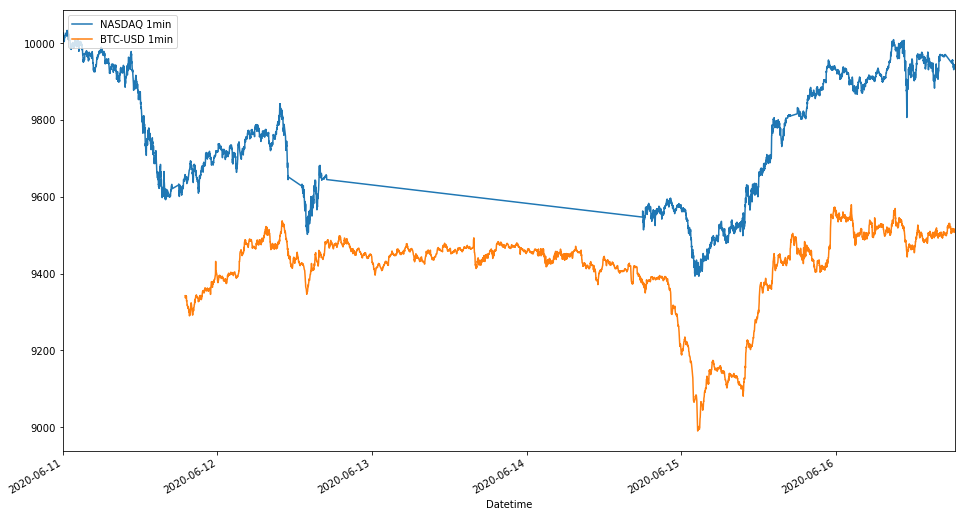

In [165]:
#plots notional value of ticker
import matplotlib.pyplot as plt
import time
import bokeh
import numpy as np
import yfinance as yf
import pandas as pd

#get data (few min delay)
nasdaq = yf.Ticker("NQ=F")
btc = yf.Ticker("BTC-USD")

nasdaq= nasdaq.history(period="5d", interval="1m")
btc = btc.history(period="5d", interval="1m")
#clean data
nasdaq = nasdaq.drop(columns=['Dividends', 'Stock Splits'])
btc = btc.drop(columns=['Dividends', 'Stock Splits'])
#plot
nasdaq['Close'].plot(figsize=(16, 9), label="NASDAQ 1min")
btc['Close'].plot(figsize=(16, 9), label="BTC-USD 1min")


plt.legend(loc="upper left")
#hist['High'].plot(figsize=(16, 9))
#hist['Low'].plot(figsize=(16, 9))
plt.show()

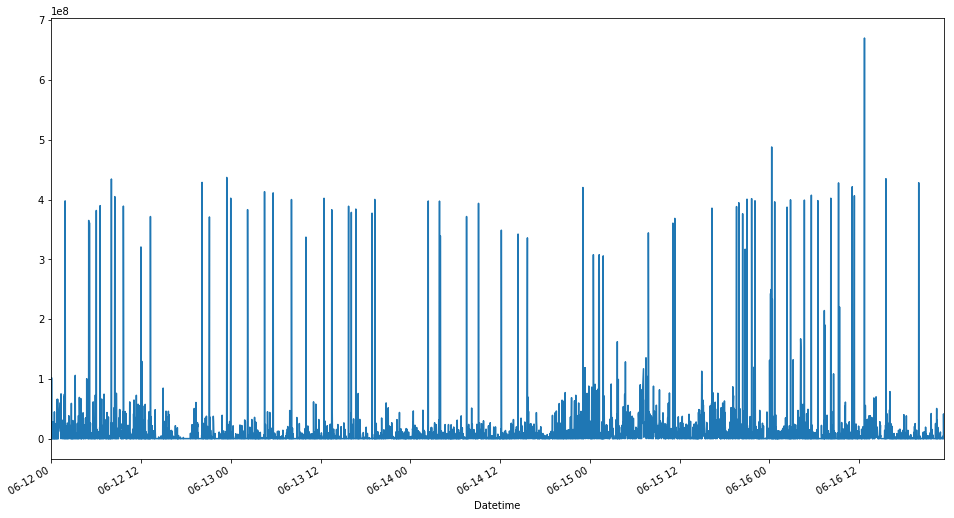

In [113]:
btc['Volume'].plot(figsize=(16, 9), label="BTC-USD Vol")

In [114]:
#adjust for % change
btc = yf.Ticker("BTC-USD")
snp = yf.Ticker("YM=F")
sist= snp.history(period="5d", interval="1m")
hist = btc.history(period="5d", interval="1m")
#clean data
hist = hist.drop(columns=['Dividends', 'Stock Splits'])
sist = sist.drop(columns=['Dividends', 'Stock Splits'])
firstval = hist['Close'][0]
firstval2 = sist['Close'][0]

hist = hist['Close'].map(lambda Close: (Close/firstval)*1)-1 #adjust for % change
sist = sist['Close'].map(lambda Close: (Close/firstval2)*1)-1 #adjust for % change



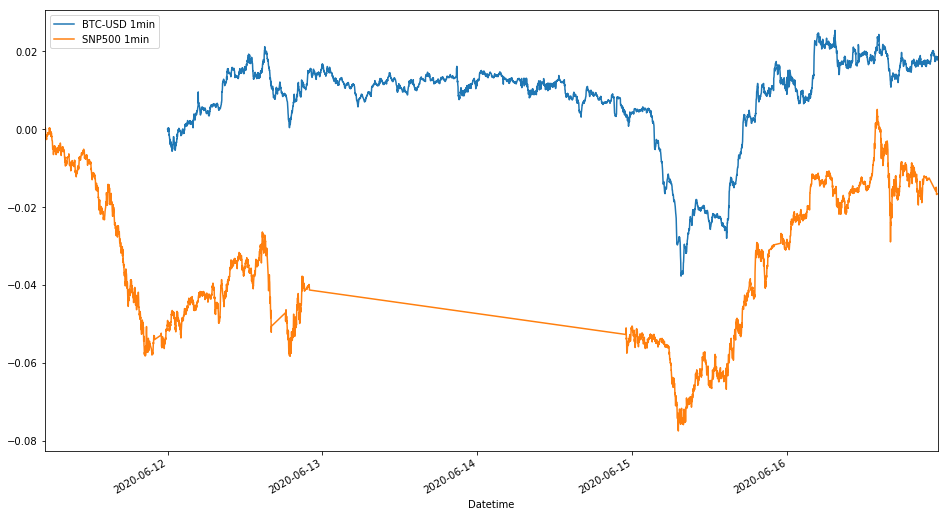

In [115]:

hist.plot(figsize=(16, 9), label="BTC-USD 1min")
sist.plot(figsize=(16, 9), label="SNP500 1min")
plt.legend(loc="upper left")
#hist['High'].plot(figsize=(16, 9))
#hist['Low'].plot(figsize=(16, 9))
plt.show()



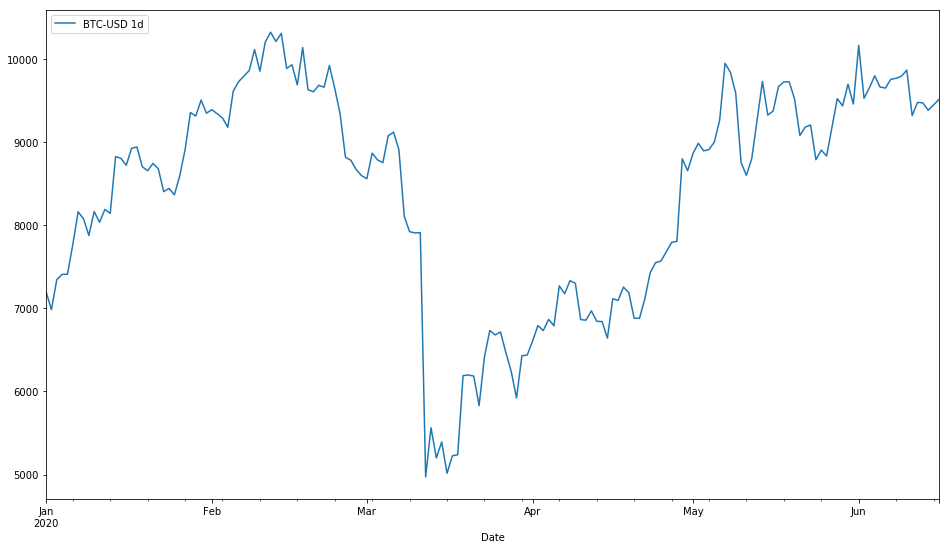

In [166]:
btc = yf.Ticker("BTC-USD")

btc = btc.history(period="ytd", interval="1d")
#clean data
#nasdaq = nasdaq.drop(columns=['Dividends', 'Stock Splits'])
#btc = btc.drop(columns=['Dividends', 'Stock Splits'])
#plot
#nasdaq['Close'].plot(figsize=(16, 9), label="NASDAQ 1min")
btc['Close'].plot(figsize=(16, 9), label="BTC-USD 1d")


plt.legend(loc="upper left")
#hist['High'].plot(figsize=(16, 9))
#hist['Low'].plot(figsize=(16, 9))
plt.show()

In [167]:
#1yr price gain
btc_c = btc['Close']
btc_c
first_open = btc['Open'].iloc[0]
first_open
last_close = btc['Close'].iloc[-1]
last_close-first_open
btc['Daily Change'] = pd.Series(btc['Close']-btc['Open'])

In [168]:
print"1yr change:",last_close-first_open

print "Buy at open, sell at daily close", btc['Daily Change'].sum()


1yr change: 2318.919999999999
Buy at open, sell at daily close 2247.9800000000096


In [169]:
print "Daily change standard dev", np.std(btc['Daily Change'])

Daily change standard dev 362.30273020608297


In [170]:
btc['Overnight Change'] = pd.Series(btc['Open']-btc['Close'].shift(1))
print "Overnight change standard dev", np.std(btc['Overnight Change'])

Overnight change standard dev 5.26554656656832


In [171]:
btc[btc['Daily Change']<0]['Overnight Change'].mean()

-0.2792207792208855

In [172]:
btc[btc['Overnight Change']<0]['Daily Change'].mean()

4.850568181818238

# Less downside overnight

In [173]:
daily_rtn = ((btc['Close']-btc['Close'].shift(1))/btc['Close'].shift(1))*100
id_rtn = ((btc['Close'])-btc['Open'])/btc['Open']*100
on_rtn = ((btc['Open'])-btc['Close'].shift(1))/btc['Close'].shift(1)*100

In [174]:
print daily_rtn


Date
2020-01-01         NaN
2020-01-02   -2.981874
2020-01-03    5.145108
2020-01-04    0.895590
2020-01-05    0.008906
2020-01-06    4.829099
2020-01-07    5.077344
2020-01-08   -1.026864
2020-01-09   -2.485068
2020-01-10    3.648654
2020-01-11   -1.579737
2020-01-12    1.927829
2020-01-13   -0.589564
2020-01-14    8.393345
2020-01-15   -0.235054
2020-01-16   -0.944929
2020-01-17    2.352762
2020-01-18    0.154216
2020-01-19   -2.645254
2020-01-20   -0.558335
2020-01-21    1.019331
2020-01-22   -0.743321
2020-01-23   -3.160509
2020-01-24    0.462855
2020-01-25   -0.918603
2020-01-26    2.736426
2020-01-27    3.640761
2020-01-28    5.036802
2020-01-29   -0.448358
2020-01-30    2.064695
                ...   
2020-05-18    0.577412
2020-05-19    0.025292
2020-05-20   -2.117989
2020-05-21   -4.633214
2020-05-22    1.110137
2020-05-23    0.290877
2020-05-24   -4.548885
2020-05-25    1.325997
2020-05-26   -0.807012
2020-05-27    3.915880
2020-05-28    3.754812
2020-05-29   -0.909430
2020-0

In [175]:
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = wins/losses
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    cnt = len(s)
    print "Trades:", cnt,\
    "\nwins:", wins,\
    "\nlosses:", losses,\
    "\nB/E:", evens,\
    "\nwin ratio:", win_r,\
    "\nmean win:", mean_w,\
    "\nmean loss:", mean_l,\
    "\nmean:", mean_trd,\
    "\nstddev:", sd,\
    "\nmax loss:", max_l,\
    "\nmax win:", max_w,\
    "\nsharpe ratio:", sharpe_r,\

    

In [176]:
get_stats(daily_rtn)

Trades: 167 
wins: 89 
losses: 78 
B/E: 0 
win ratio: 1 
mean win: 2.884 
mean loss: -2.669 
mean: 0.29 
stddev: 4.708 
max loss: -37.17 
max win: 18.188 
sharpe ratio: 0.9794


In [177]:
get_stats(id_rtn)

Trades: 168 
wins: 91 
losses: 77 
B/E: 0 
win ratio: 1 
mean win: 2.803 
mean loss: -2.702 
mean: 0.28 
stddev: 4.674 
max loss: -37.187 
max win: 18.03 
sharpe ratio: 0.9509


In [178]:
get_stats(on_rtn)

Trades: 167 
wins: 78 
losses: 88 
B/E: 1 
win ratio: 0 
mean win: 0.051 
mean loss: -0.029 
mean: 0.008 
stddev: 0.09 
max loss: -0.237 
max win: 0.946 
sharpe ratio: 1.4908
